In [7]:
from utils.game_map_class import GameMap
from utils.game_team_class import GameTeam
from utils.strategy_class import Strategy, RandomStrategy, RuleOfThumbStrategy, LookaheadRolloutStrategy
from utils.map_setup_functions import setGameBoardRandom, initializeFullRiskMap

In [8]:
full_risk_map = initializeFullRiskMap()
team_names = ["blue", "red"]
team_strategies = [LookaheadRolloutStrategy, RuleOfThumbStrategy]
risk_map, teams = setGameBoardRandom(team_names, full_risk_map, team_strategies)
#risk_map, teams = setGameBoardRandom(team_names, full_risk_map, RandomStrategy)

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
pos = {}

pos['Alaska'] = (1,7)
pos['North West Territory'] = (2,7)
pos['Greenland'] = (3,7)
pos['Iceland'] = (4,7)
pos['Scandinavia'] = (5,7)
pos['Alberta'] = (1,6)
pos['Ontario'] = (2,6)
pos['Quebec'] = (3,6)
pos['Great Britain'] = (4,6)
pos['Northern Europe'] = (5,6)
pos['Ukraine'] = (6,6)
pos['Ural'] = (7,6)
pos['Siberia'] = (8,6)
pos['Irkutsk'] = (9,6)
pos['Japan'] = (10,6)
pos['Yakutsk'] = (9,7)
pos['Kamchatka'] = (10,7)
pos['Western United States'] = (1,5)
pos['Eastern United States'] = (2,5)
pos['Western Europe'] = (4,5)
pos['Southern Europe'] = (5,5)
pos['Afghanistan'] = (7,5)
pos['China'] = (8,5)
pos['Mongolia'] = (9,5)
pos['Central America'] = (1,4)
pos['Middle East'] = (7, 4)
pos['India'] = (8,4)
pos['Siam'] = (9,4)
pos['Venezuela'] = (1,3)
pos['Brazil'] = (2,3)
pos['North Africa'] = (4,4)
pos['Egypt'] = (5,4)
pos['Congo'] = (4,3)
pos['East Africa'] = (5,3)
pos['Peru'] = (1,2)
pos['Argentina'] = (2,2)
pos['South Africa'] = (4,2)
pos['Madagascar'] = (5,2)
pos['Indonesia'] = (9,3)
pos['New Guinea'] = (10,3)
pos['Western Australia'] = (9,2)
pos['Eastern Australia'] = (10,2)

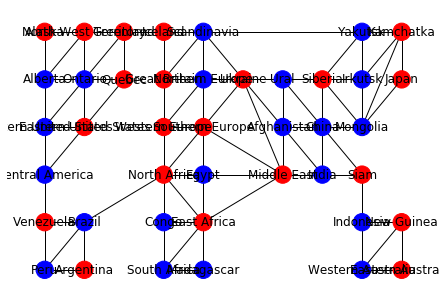

In [5]:
color_map = risk_map.getTeamColorMap()
nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)

In [6]:
teams[0].addTroops('Venezuela', -3)
teams[0].addTroops('Madagascar', -3)

teams[0].getNextMove(depth_ = 1, print_ = True)

Exception: Resulting number of troops cannot be negative

In [ ]:
dad

In [ ]:
full_risk_map = initializeFullRiskMap()
team_names = ["blue", "red"]
team_strategies = [RuleOfThumbStrategy, LookaheadRolloutStrategy]
#team_strategies = [LookaheadRolloutStrategy, RuleOfThumbStrategy]
risk_map, teams = setGameBoardRandom(team_names, full_risk_map, team_strategies)
curr_team = teams[0]
defending_team = teams[1]

counter = 0
while defending_team.hasTeamWon() == False:
    curr_team.playTurn(depth_ = 3, print_ = False)
    curr_team_temp = curr_team
    curr_team = defending_team
    defending_team = curr_team_temp
    color_map = risk_map.getTeamColorMap()
    nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)
    plt.show()
    counter += 1
print("{defender} team has won in {num_turns} turns".format(defender = defending_team.getName(), num_turns = counter//2))

In [10]:
import numpy as np

In [15]:
%%capture
import random
winner_array = []
winner_count = []
starter_array = []
winner_array = np.load('winners.npy').tolist()

starter_array = np.load('starters.npy').tolist()
for _ in range(100):
    full_risk_map = initializeFullRiskMap()
    if random.choice([0, 1]) == 0:
        team_names = ["blue", "red"]
        team_strategies = [LookaheadRolloutStrategy, RuleOfThumbStrategy]
        starter_array.append("blue")
    else:
        team_names = ["red", "blue"]
        team_strategies = [RuleOfThumbStrategy, LookaheadRolloutStrategy]
        starter_array.append("red")
        
    risk_map, teams = setGameBoardRandom(team_names, full_risk_map, team_strategies)
    #risk_map, teams = setGameBoardRandom(team_names, full_risk_map, RandomStrategy)
    curr_team = teams[0]
    defending_team = teams[1]
    counter = 0
    while defending_team.hasTeamWon() == False:
        curr_team.playTurn(depth_ = 4)
        curr_team_temp = curr_team
        curr_team = defending_team
        defending_team = curr_team_temp
        color_map = risk_map.getTeamColorMap()
        nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)
        plt.show()
        counter += 1
    
    winner_array.append(defending_team.getName())
    winner_count.append(counter // 2)
    
    np.save('winners.npy', np.array(winner_array))
    np.save('starters.npy', np.array(starter_array))
    np.save('winners_count.npy', np.array(winner_count))
    print("{defender} team has won in {num_turns} turns".format(defender = defending_team.getName(), num_turns = counter//2))
    
    
    

In [ ]:
import numpy as np

In [ ]:
c = 0
for i in range(len(a)):
    ai = a[i]
    bi = b[i]
    if ai == 'blue':
        c += 1
c
        